# RQ1 - Influence of the programming style on the performance of the participants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from fitter import Fitter, get_common_distributions, get_distributions
plt.rcParams['savefig.facecolor']='white'

In [2]:
df = pd.read_csv('./data/preprocessed_experiment_data.csv')
df = df[df["Outlier"] == False]
df

,ID,ProgrammingStyle,Algorithm,ResponseTime,Correctness,ClickData,TimeData,Outlier
0,212,iterative,apply,66794,False,268-191 151-70 151-70 146-89 135-12 135-65 120...,10105 34435 35005 39192 47146 56587 61358 66794,False
1,245,iterative,apply,21078,True,156-17 174-195 129-44 131-62 141-93 141-114 14...,1123 3472 14145 14878 16035 19911 21078,False
2,272,iterative,apply,81561,True,188-192 104-34 132-69 149-89,16519 78023 79043 81561,False
3,296,iterative,apply,22825,False,160-195 122-115 148-9 138-34 140-60 132-94 153...,4194 11386 13568 14369 15567 17215 21808 22825,False
4,302,iterative,apply,20310,True,69-204 84-191 150-197 254-200 183-14 85-36 95-...,4193 5008 5850 6351 8856 10441 11790 13309 20310,False
...,...,...,...,...,...,...,...,...
297,213,list-comprehension,LinkedList,153552,False,42-22 65-45 51-123 81-143 111-161 100-143 50-1...,4155 9379 12561 13652 21857 23971 25078 25989 ...,False
298,252,list-comprehension,LinkedList,47933,True,110-12 118-37 101-117 126-142 134-170 137-190 ...,3853 4218 8660 9020 9434 9893 11026 11335 1200...,False
300,297,list-comprehension,LinkedList,48782,True,80-9 90-33 88-125 103-146 109-170 114-194 103-...,3545 4213 6711 7143 7700 8598 9962 10333 11843...,False
301,309,list-comprehension,LinkedList,55439,False,78-15 80-37 81-117 109-146 106-170 106-192 114...,3924 4856 5841 6974 7497 8040 10490 11359 1325...,False


## Correlations

### Correctness Ratio

In [3]:
df_correctness_ratio = pd.DataFrame([], columns=["ID", "ProgrammingStyle", "NumberOfCorrect", "NumberOfTotal"])

for (participant, style), df_group in df.groupby(["ID", "ProgrammingStyle"]):

    correct = len(df_group[df_group["Correctness"] == True])
    total = len(df_group)
    df_correctness_ratio.loc[len(df_correctness_ratio)] = [participant, style, correct, total]

df_correctness_ratio["CorrectnessRatio"] = df_correctness_ratio["NumberOfCorrect"] / df_correctness_ratio["NumberOfTotal"]
df_correctness_ratio

,ID,ProgrammingStyle,NumberOfCorrect,NumberOfTotal,CorrectnessRatio
0,194,iterative,0,1,0.0
1,195,list-comprehension,0,1,0.0
2,196,higher-order,0,3,0.0
3,196,iterative,1,2,0.5
4,196,list-comprehension,0,3,0.0
...,...,...,...,...,...
113,319,recursive,1,1,1.0
114,320,higher-order,2,2,1.0
115,320,iterative,3,3,1.0
116,320,list-comprehension,2,3,0.666667


### Response Time Data

In [4]:
df_response_time = df[["ID", "Algorithm", "ProgrammingStyle", "ResponseTime"]].copy()
df_response_time["ResponseTime"] = df_response_time["ResponseTime"].astype(float).apply(lambda x: x/1000.)

df_tmp = df_response_time.copy()
df_tmp["Algorithm"] = "total"
df_response_time = df_response_time.append(df_tmp)

df_response_time

,ID,Algorithm,ProgrammingStyle,ResponseTime
0,212,apply,iterative,66.794
1,245,apply,iterative,21.078
2,272,apply,iterative,81.561
3,296,apply,iterative,22.825
4,302,apply,iterative,20.310
...,...,...,...,...
297,213,total,list-comprehension,153.552
298,252,total,list-comprehension,47.933
300,297,total,list-comprehension,48.782
301,309,total,list-comprehension,55.439


## Load Demographic Data

In [15]:
variable_mapping = {
    "CASE" : "ID",
    "ST04_01" : "C++",
    "ST04_02" : "Java",
    "ST04_03" : "Haskell",
    "ST04_04" : "Python",
    "ST04_05" : "Prolog",
    "ST04_06" : "Rust",
    "ST04_07" : "Kotlin",
    "ST05_01" : "Logical",
    "ST05_02" : "Imperative",
    "ST05_03" : "Functional",
    "ST05_04" : "ObjectOriented",
    "ST12" : "Iteration",
    "ST13" : "Recursion",
    "ST14" : "HigherOrder",
    "ST15" : "ListComprehension",
}

df_demographics = pd.read_csv('./data/preprocessed_total_data.csv')
df_demographics = df_demographics[variable_mapping.keys()]
df_demographics.columns = variable_mapping.values()
df_language = df_demographics.melt(id_vars="ID", value_vars=["C++", "Java", "Haskell", "Python", "Prolog", "Rust", "Kotlin"], value_name="PreExperience", var_name="Language")
df_paradigm = df_demographics.melt(id_vars="ID", value_vars=["Logical", "Imperative", "Functional", "ObjectOriented"], value_name="PreExperience", var_name="Paradigm")
df_style = df_demographics.melt(id_vars="ID", value_vars=["Iteration", "Recursion", "HigherOrder", "ListComprehension"], value_name="PreExperience", var_name="Style")

,ID,Style,PreExperience
0,194,Iteration,4.0
1,195,Iteration,4.0
2,196,Iteration,4.0
3,198,Iteration,4.0
4,199,Iteration,5.0
...,...,...,...
187,316,ListComprehension,3.0
188,317,ListComprehension,4.0
189,318,ListComprehension,4.0
190,319,ListComprehension,4.0


<ipython-input-52-a391bfc9da82>:8: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', basey=2)


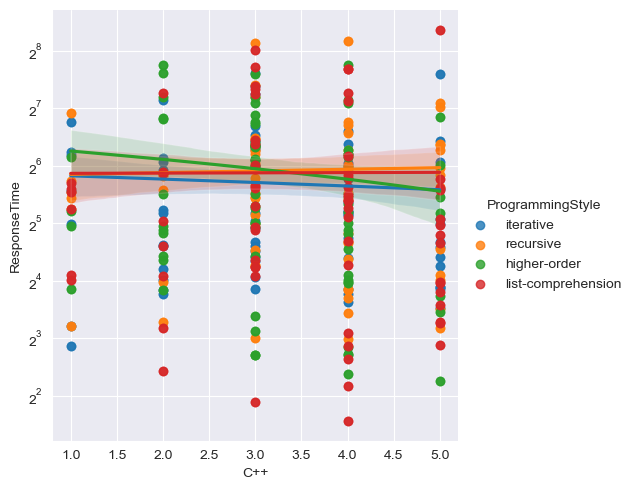

In [52]:
df_tmp = df_response_time.merge(df_demographics, on="ID")
df_tmp = df_tmp.drop(["ID", "Algorithm"], axis=1)
for factor in variable_mapping.values():
    if factor == "ID":
        continue
    sns.lmplot(y="ResponseTime", x=factor, hue="ProgrammingStyle", data=df_tmp)
    break
plt.yscale('log', basey=2)
plt.show()

In [30]:
sns.pairplot(df_recursive, hue="species")

TypeError: operands could not be broadcast together with shapes (556,) (556,4) 

In [31]:
df_response_time

,ID,Algorithm,ProgrammingStyle,ResponseTime
0,212,apply,iterative,66.794
1,245,apply,iterative,21.078
2,272,apply,iterative,81.561
3,296,apply,iterative,22.825
4,302,apply,iterative,20.310
...,...,...,...,...
297,213,total,list-comprehension,153.552
298,252,total,list-comprehension,47.933
300,297,total,list-comprehension,48.782
301,309,total,list-comprehension,55.439
